<a href="https://colab.research.google.com/github/ashishdhawas/Coronavirus-Tweet-Sentiment-Analysis/blob/main/Coronavirus_Tweet_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Sentiment Analysis : Predicting sentiment of COVID-19 tweets



##### **Project Type**    - Classification
##### **Contribution**    - Individual


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/ashishdhawas/Coronavirus-Tweet-Sentiment-Analysis

# **Problem Statement**


This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

The names and usernames have been given codes to avoid any privacy concerns.


You are given the following information:

Location

Tweet At

Original Tweet

Label

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import ast
import re # for regular expression operations
import string
from datetime import datetime as dt
from datetime import date
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.style as style
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# NLP Libraries
import nltk # for text manipulation
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [76]:
# Import Sklearn Libraries
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

### Dataset Loading

In [4]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Coronavirus Tweets.csv', encoding = 'latin')

### Dataset First View

In [6]:
# Dataset First Look
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [7]:
df.tail()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral
41156,44955,89907,i love you so much || he/him,14-04-2020,@TartiiCat Well new/used Rift S are going for ...,Negative


### Dataset Rows & Columns count

In [8]:
# Dataset Rows & Columns count
df.shape

(41157, 6)

In our dataset we have 41157 rows and 6 columns

### Dataset Information

In [9]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


#### Duplicate Values

In [10]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

In our dataset we don't have duplicate records

#### Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count
df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In the Location column we have 8590 null values, but we don't need to remove this because for sentiment analysis we use OriginalTweet column. If we remove this null values we lost the tweets also.

<Axes: >

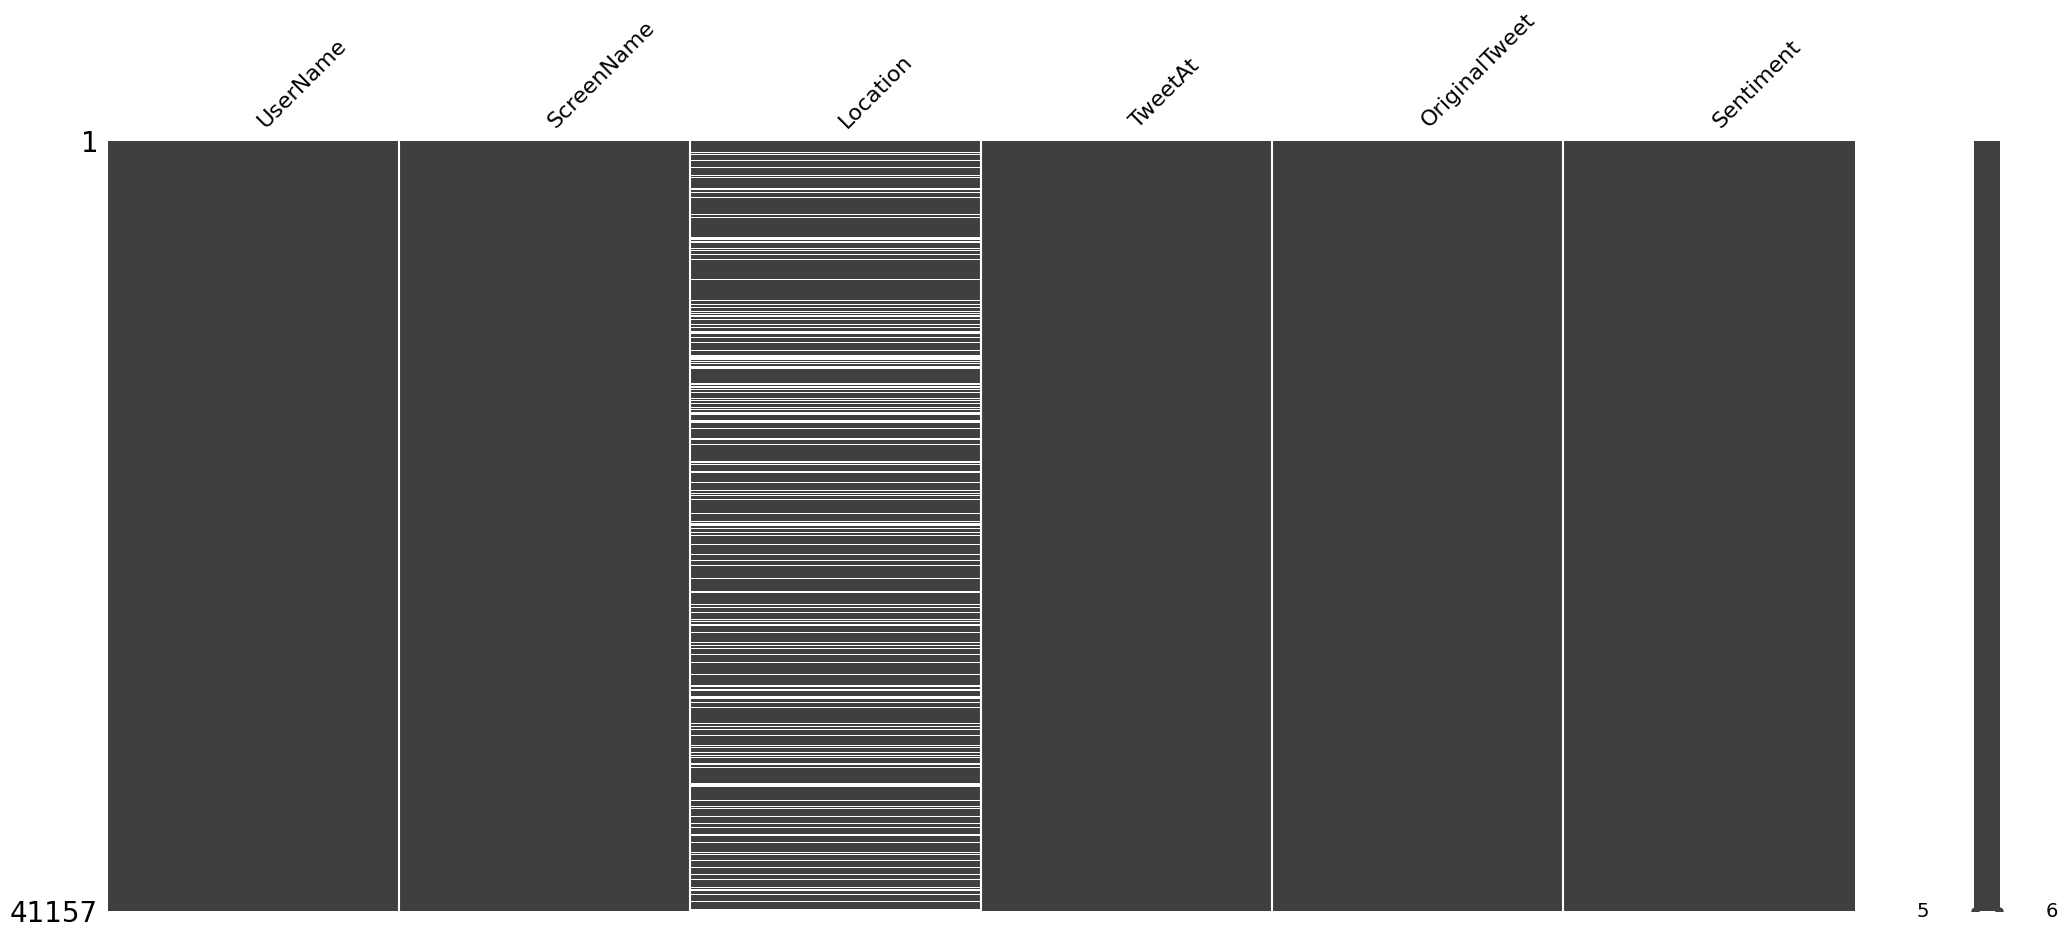

In [12]:
# Visualizing the missing values
import missingno as msno   #library imported for exploratory visualization of missing data

msno.matrix(df)

### What did you know about your dataset?

In our dataset we have 41157 rows and 6 columns.

We have 0 duplicate records.

In the Location column we have missing values.

In order to analyse the data we required only two columns "OriginalTweet" & "Sentiment".

The columns such as “UserName” and “ScreenName” does not give any meaningful insights for our analysis.

There are five types of sentiments- Extremely Negative, Negative, Neutral, Positive and Extremely Positive.

All tweets data collected from the months of March and April 2020. Bar plot shows us the number of unique values in each column.

Most of the tweets came from London followed by U.S.

## ***Understanding Your Variables***

In [13]:
# Dataset Columns
df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [14]:
# Dataset Describe
df.describe()

,UserName,ScreenName
count,41157.000000,41157.000000
mean,24377.000000,69329.000000
std,11881.146851,11881.146851
min,3799.000000,48751.000000
25%,14088.000000,59040.000000
50%,24377.000000,69329.000000
75%,34666.000000,79618.000000
max,44955.000000,89907.000000


### Variables Description

In our dataset we have only two numerical variables that is "UserName" and "ScreenName".

Here we see the difference between mean of both the variables and standard deviation is same for both the variables.

### Check Unique Values for each variable.

In [15]:
# Check Unique Values for each variable.
df.nunique()

UserName         41157
ScreenName       41157
Location         12220
TweetAt             30
OriginalTweet    41157
Sentiment            5
dtype: int64

In [16]:
print(df.apply(lambda col: col.unique()))

UserName         [3799, 3800, 3801, 3802, 3803, 3804, 3805, 380...
ScreenName       [48751, 48752, 48753, 48754, 48755, 48756, 487...
Location         [London, UK, Vagabonds, nan, ÃT: 36.319708,-8...
TweetAt          [16-03-2020, 17-03-2020, 18-03-2020, 19-03-202...
OriginalTweet    [@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/...
Sentiment        [Neutral, Positive, Extremely Negative, Negati...
dtype: object


In [17]:
#There are 12220 unique locations from where tweet came
df['Location'].value_counts()

London                          540
United States                   528
London, England                 520
New York, NY                    395
Washington, DC                  373
                               ... 
Staffordshire Moorlands           1
Kithchener ON                     1
Tulsa, Ok                         1
Watford, South Oxhey, Bushey      1
i love you so much || he/him      1
Name: Location, Length: 12220, dtype: int64

In [18]:
# There are 5 unique Sentiment
df['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

## ***Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1  Graphical representation of sentiment column :

In [19]:
sentiment_count = df['Sentiment'].value_counts().reset_index()
sentiment_count.columns=['Sentiment','count']
sentiment_count

,Sentiment,count
0,Positive,11422
1,Negative,9917
2,Neutral,7713
3,Extremely Positive,6624
4,Extremely Negative,5481


Text(0, 0.5, 'Count')

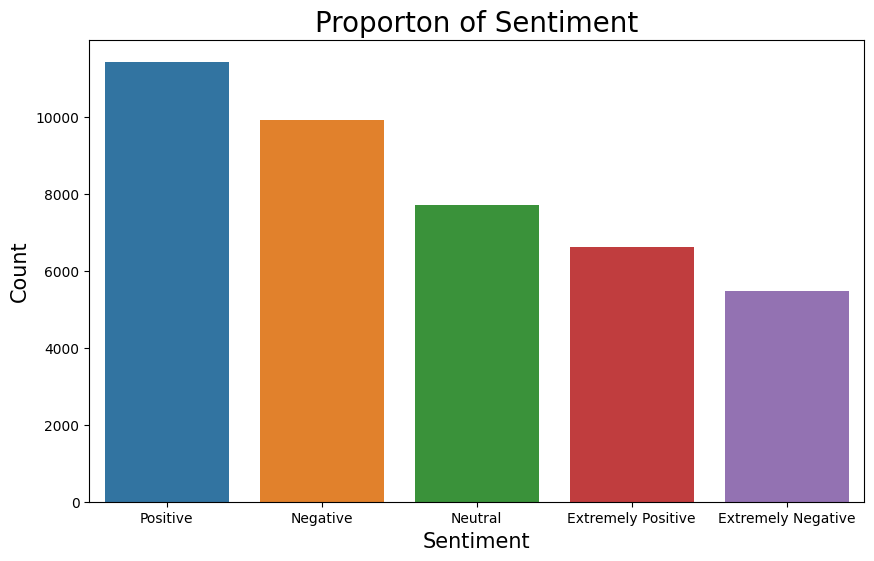

In [20]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x="Sentiment", y= 'count', data=sentiment_count)
ax.set_title('Proporton of Sentiment', fontsize=20)
ax.set_xlabel("Sentiment",fontsize=15)
ax.set_ylabel("Count",fontsize=15)

##### 1. Why did you pick the specific chart?

Bar chart is the simplest and easyiest chart to portray how values is ditributed, Here X-axies shows the sentiment of the tweets, and Y-axis has the number of count.

##### 2. What is/are the insight(s) found from the chart?

The Positive sentiment has the highest number of count followed by negative, neutral and extremely positive and then extremely negative has lowest number of count.

#### Chart - 2   Unique value in each feature columns

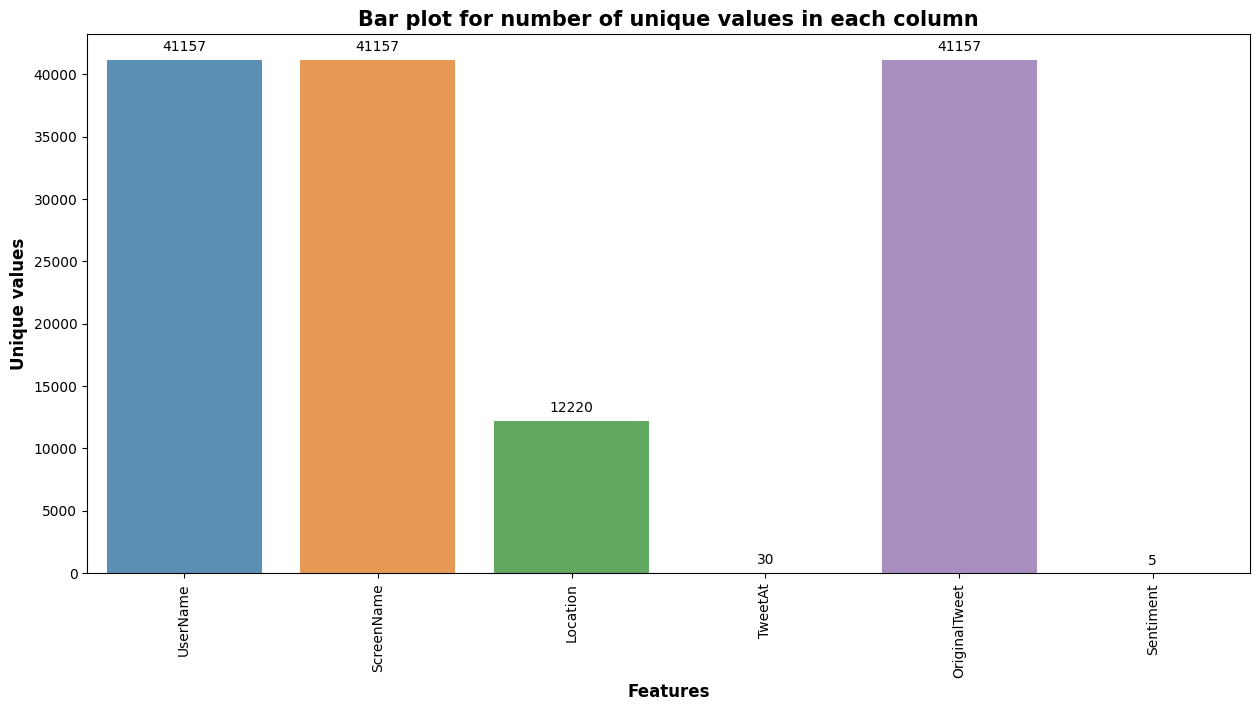

In [21]:
unique_df=pd.DataFrame()
unique_df['Features']=df.columns
unique=[]
for i in df.columns:
  unique.append(df[i].nunique())
unique_df['Uniques']=unique



f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

Bar chart is the simplest and easyiest chart to portray how values is ditributed, Here X-axies shows the Features, and Y-axis has the unique value count.

##### 2. What is/are the insight(s) found from the chart?

So for the features UserName, ScreenName, OriginalTweet has the highest number of unique value count followed by Location and for the TweetAt and Sentiment has very lowest unique value count.

#### Chart - 3  CountPlot for OriginalTweet according to "TweetAt" column

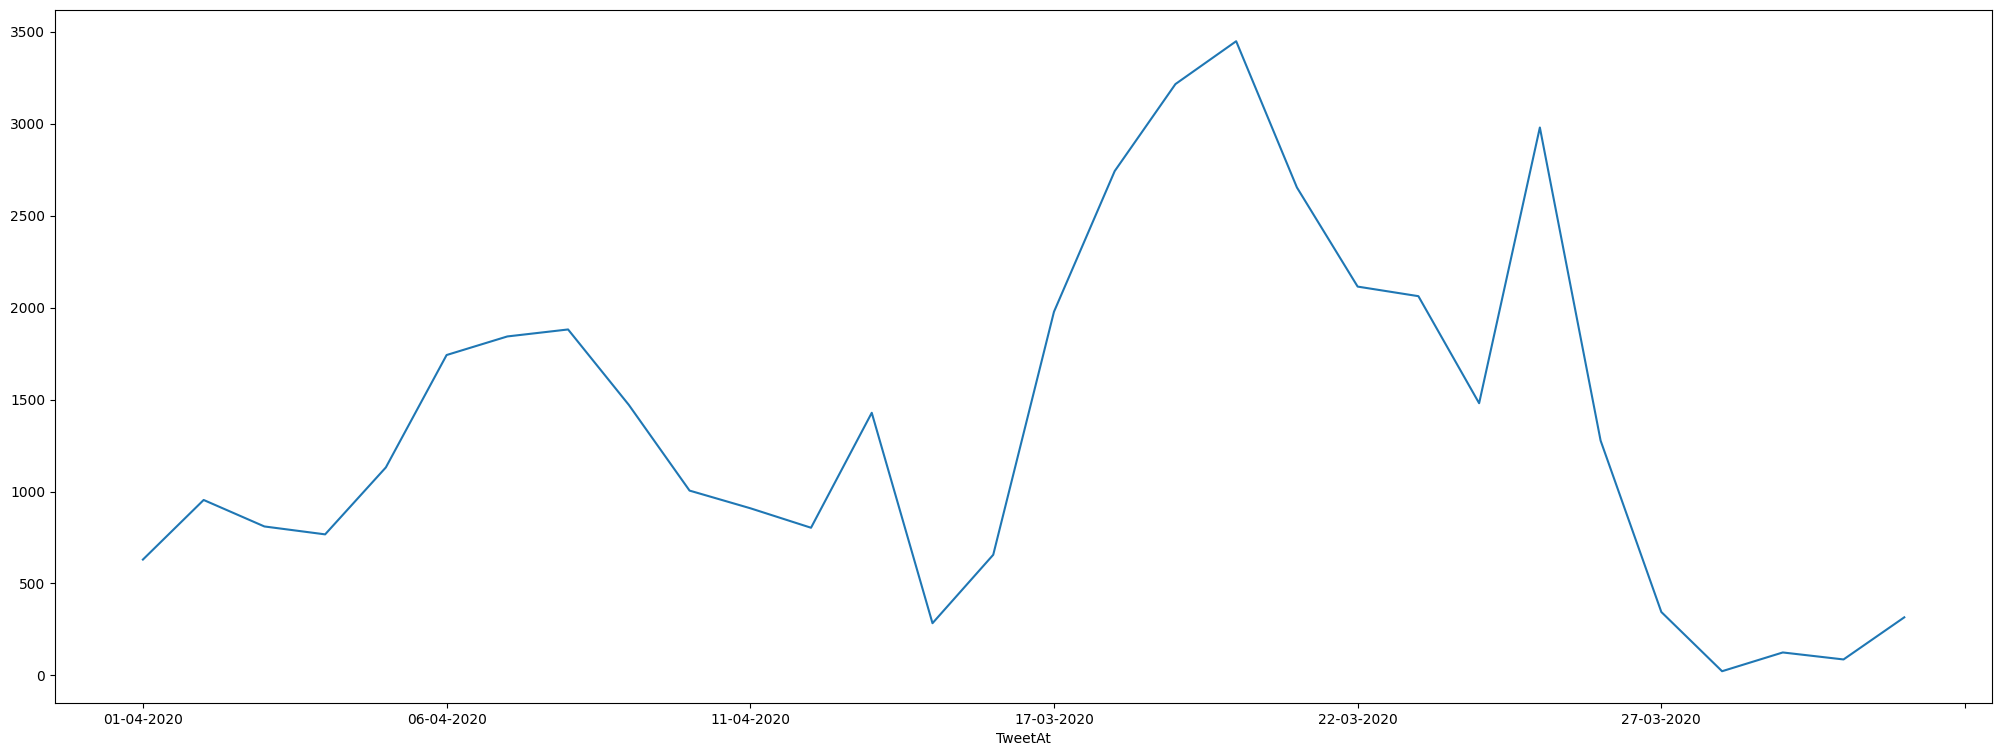

In [22]:
plt.figure(figsize=(25,9))
grp_tweetAt=df.groupby('TweetAt').count()['OriginalTweet'].plot()
plt.show()

##### 1. Why did you pick the specific chart?

We use line count plot for the Original Tweet count for the respective Date.

##### 2. What is/are the insight(s) found from the chart?

So here we can see that from the date 01-04-2020 we have see increment in the tweets and the date in between 17-03-2020 to 22-03-2020 we have most number of tweets and then decrement in the tweets.

#### Chart - 4  Histogram plot of the length of OriginalTweet.

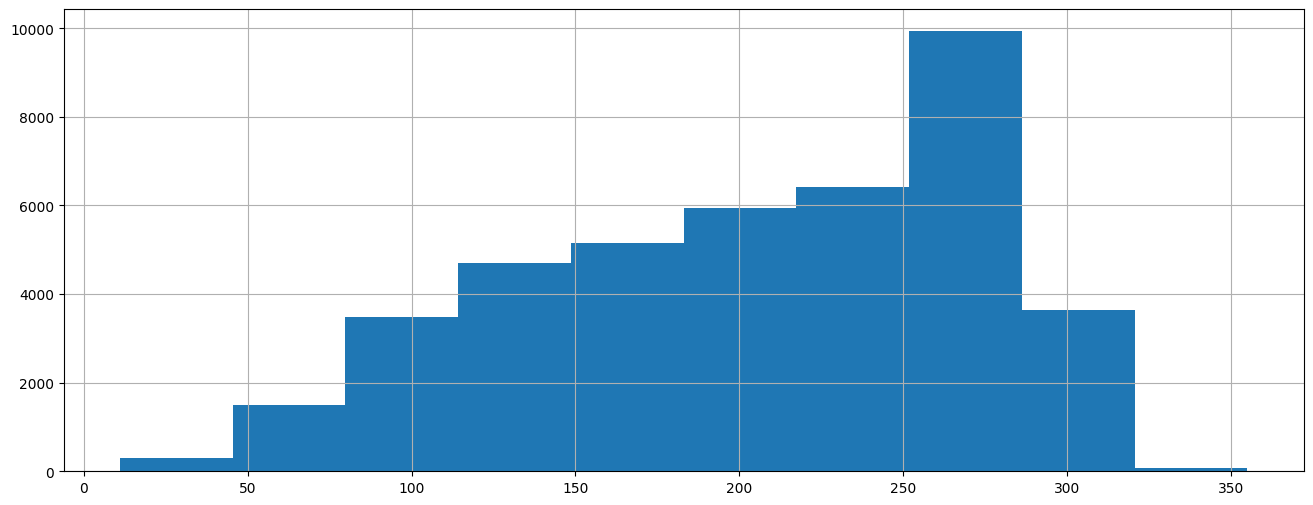

In [23]:
plt.figure(figsize=(16,6))
plt.grid()

plt.hist(df['OriginalTweet'].str.len())
plt.show()

##### 1. Why did you pick the specific chart?

because histogram gives the clear visual representation of the distribution of the data.

##### 2. What is/are the insight(s) found from the chart?

So here we see the length of the tweets is range in between 250 to 300 has the most number of tweets.

#### Chart - 5  Top 10 Location with highest tweets

In [24]:
location_top10 = df['Location'].value_counts().sort_values(ascending=False)[:10]
location_top10

London             540
United States      528
London, England    520
New York, NY       395
Washington, DC     373
United Kingdom     337
Los Angeles, CA    281
India              268
UK                 232
Australia          225
Name: Location, dtype: int64

<Axes: xlabel='Location', ylabel='count'>

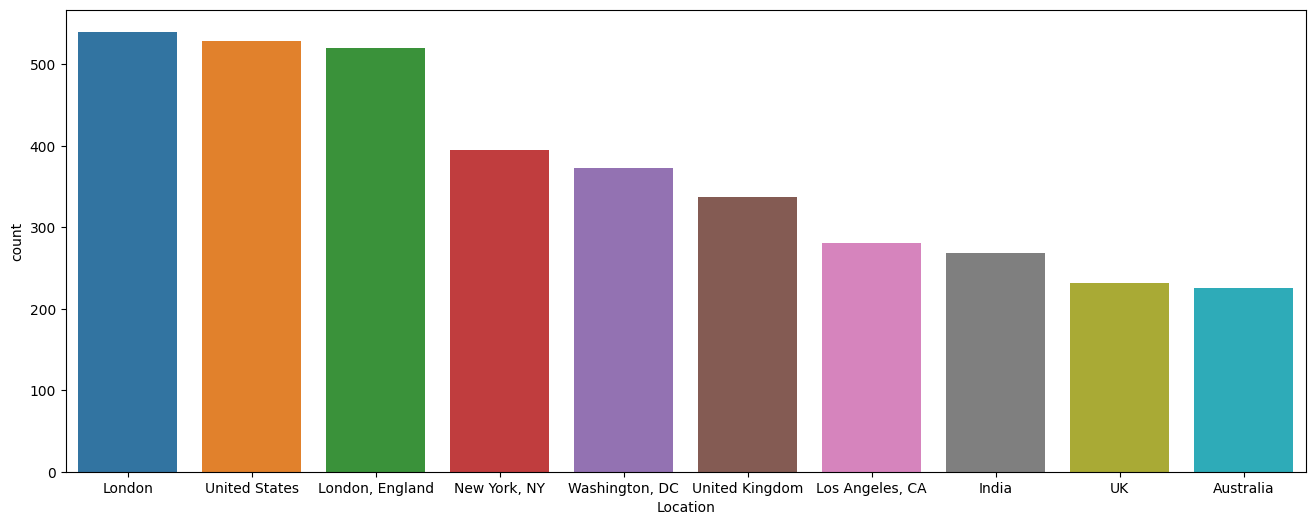

In [25]:
plt.figure(figsize=(16,6))
sns.countplot(data=df[df['Location'].isin(location_top10.index)], x='Location',order=location_top10.index)

##### 1. Why did you pick the specific chart?

It shows the relationship between number of tweets with respect to the location.

##### 2. What is/are the insight(s) found from the chart?

We see that maximum number of tweets are being done from London, United States, England and New York.

#### Chart - 6  Exploring the Sentiment Column

In [26]:
# Count of tweets as per sentiment
Sentiment=df['Sentiment'].value_counts().reset_index().rename(columns = {'index':'Sentiment Types','Sentiment':'Counts'})
print(Sentiment)

      Sentiment Types  Counts
0            Positive   11422
1            Negative    9917
2             Neutral    7713
3  Extremely Positive    6624
4  Extremely Negative    5481


Text(0.5, 1.0, 'Sentiments Types Tweet')

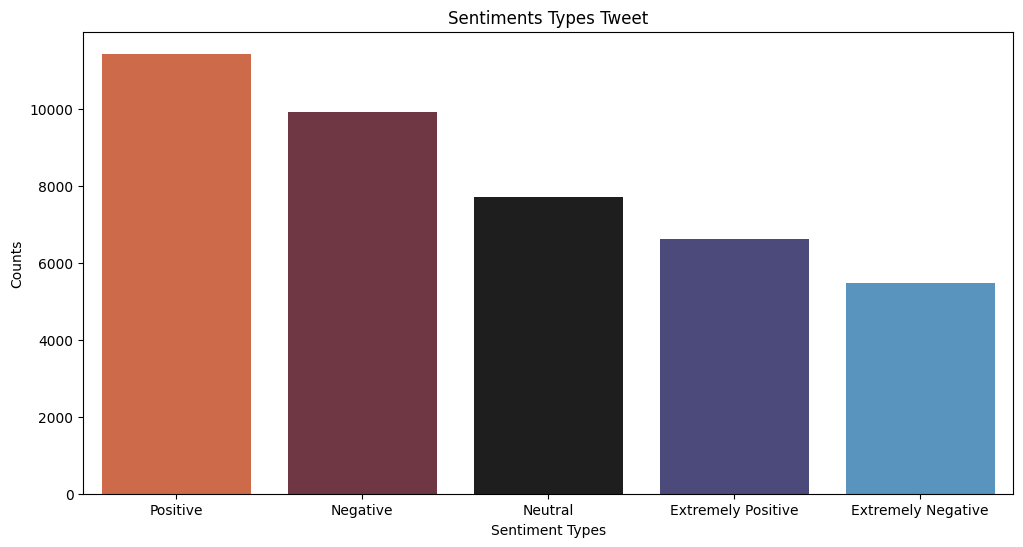

In [27]:
# Seaborn Bar plot Count of tweets as per sentiment
plt.figure(figsize=(12,6))
sns.barplot(data=Sentiment, x="Sentiment Types",y="Counts",palette ='icefire_r')

plt.title('Sentiments Types Tweet')

##### 1. Why did you pick the specific chart?

Barplot gives the count of each sentiment types.

##### 2. What is/are the insight(s) found from the chart?

The Positive sentiment has the highest number of count followed by negative, neutral and extremely positive and then extremely negative has lowest number of count.

#### Chart - 7

**There are 5 subcategories in this case, so we will combine 5-class classification problem into a 3-class classification problem by replace Extremely Positive tweets with positive tweets and Extremely Negative tweets with negative tweets.**

In [28]:
# Replacing these values 'Extremely Negative' : 'Negative', 'Extremely Positive' : 'Positive'
replace_values = {"Sentiment": {'Extremely Negative' : 'Negative', 'Extremely Positive' : 'Positive'}}
df = df.replace(replace_values)

In [29]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Negative


In [30]:
sentiment_count2 = df['Sentiment'].value_counts().reset_index()
sentiment_count2.columns=['Sentiment','count']
sentiment_count2

,Sentiment,count
0,Positive,18046
1,Negative,15398
2,Neutral,7713


Text(0, 0.5, 'Count')

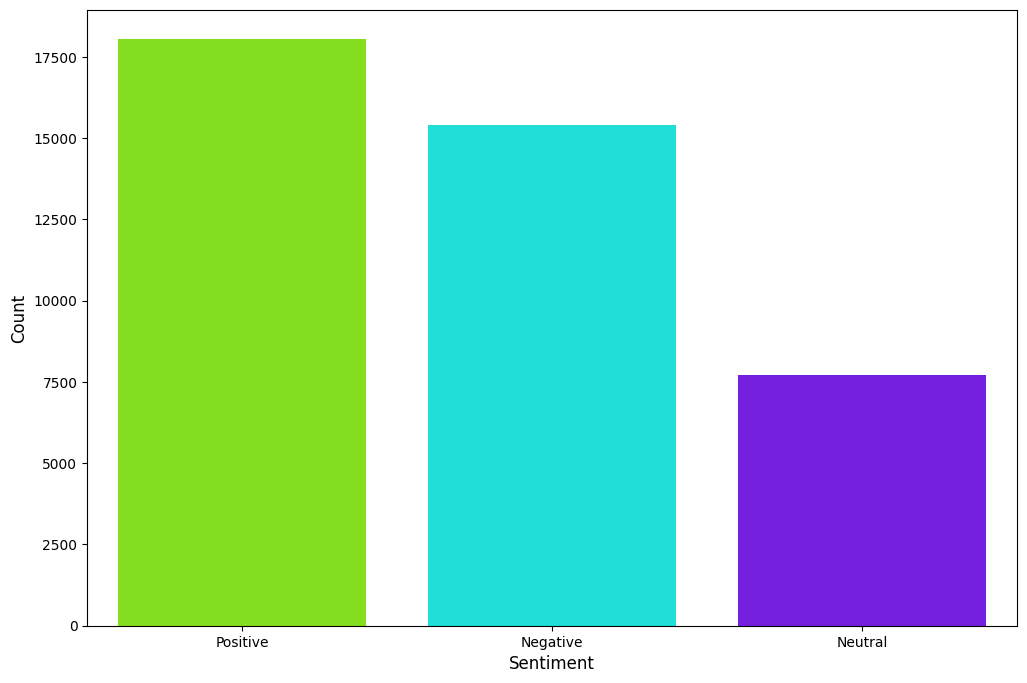

In [31]:
# Plotting the graph for the total number of tweets for the new 3 subcategories of the target variable
plt.figure(figsize=(12,8))
sns.barplot(x="Sentiment", y= 'count', data=sentiment_count2, palette='hsv')
plt.xlabel("Sentiment",fontsize=12)
plt.ylabel("Count",fontsize=12)

##### 1. Why did you pick the specific chart?

Barplot gives the count of each sentiment types.

##### 2. What is/are the insight(s) found from the chart?

The Positive sentiment has the highest number of count followed by negative and neutral.

#### Chart - 8  Top dates with maximum number of tweets

In [32]:
# Top dates with maximum number of tweets
Tweet_count=df['TweetAt'].value_counts().reset_index().rename(columns = {'index':'Tweet_Date'})
Tweet_20=Tweet_count.sort_values(by='TweetAt',ascending=False).head(21)
print(Tweet_20)

    Tweet_Date  TweetAt
0   20-03-2020     3448
1   19-03-2020     3215
2   25-03-2020     2979
3   18-03-2020     2742
4   21-03-2020     2653
5   22-03-2020     2114
6   23-03-2020     2062
7   17-03-2020     1977
8   08-04-2020     1881
9   07-04-2020     1843
10  06-04-2020     1742
11  24-03-2020     1480
12  09-04-2020     1471
13  13-04-2020     1428
14  26-03-2020     1277
15  05-04-2020     1131
16  10-04-2020     1005
17  02-04-2020      954
18  11-04-2020      909
19  03-04-2020      810
20  12-04-2020      803


Text(0.5, 1.0, 'Top dates with maximum number of tweets')

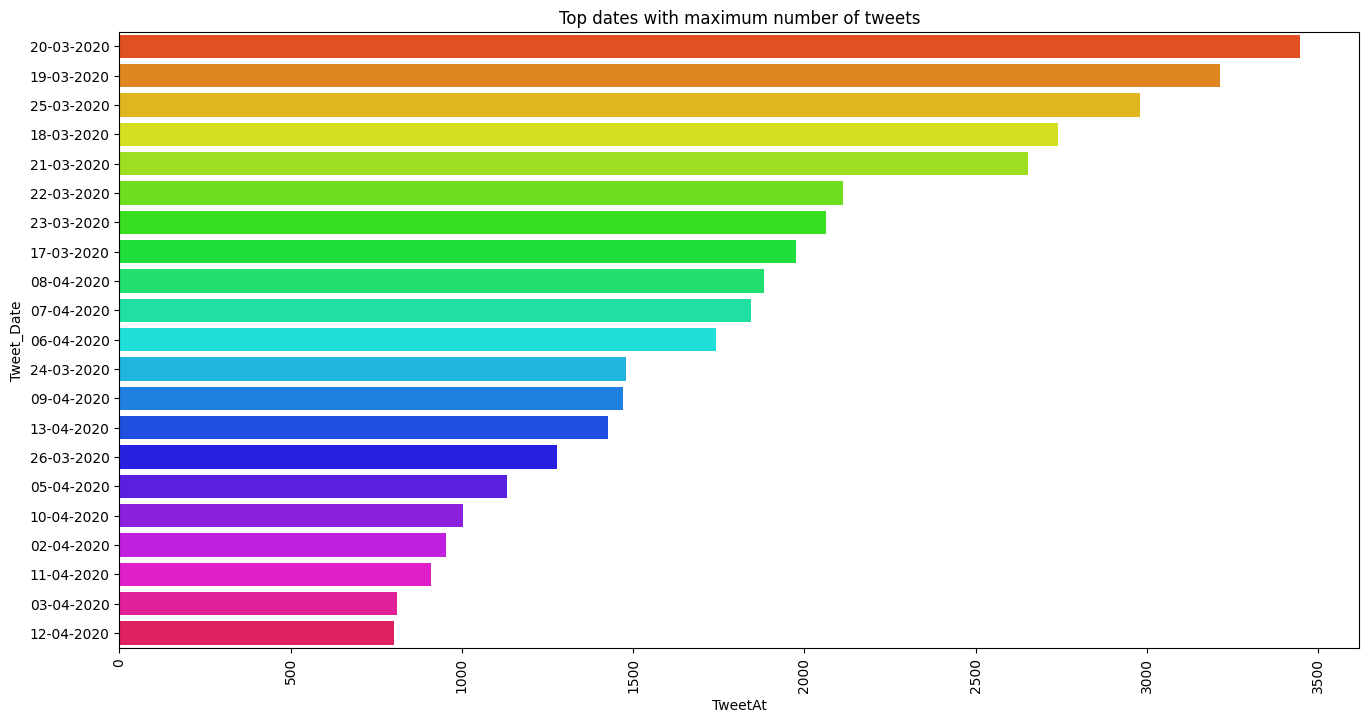

In [33]:
# seaborn Bar plot Top dates with maximum number of tweets
plt.figure(figsize=(16,8))
sns.barplot(data=Tweet_20, x="TweetAt",y="Tweet_Date",palette = ('hsv'))
plt.xticks(rotation=90)
plt.fontsize=12
plt.title('Top dates with maximum number of tweets')

#### Chart - 9  We us a package wordcloud to display the number of words and their importance in the 'OriginalTweet' column.

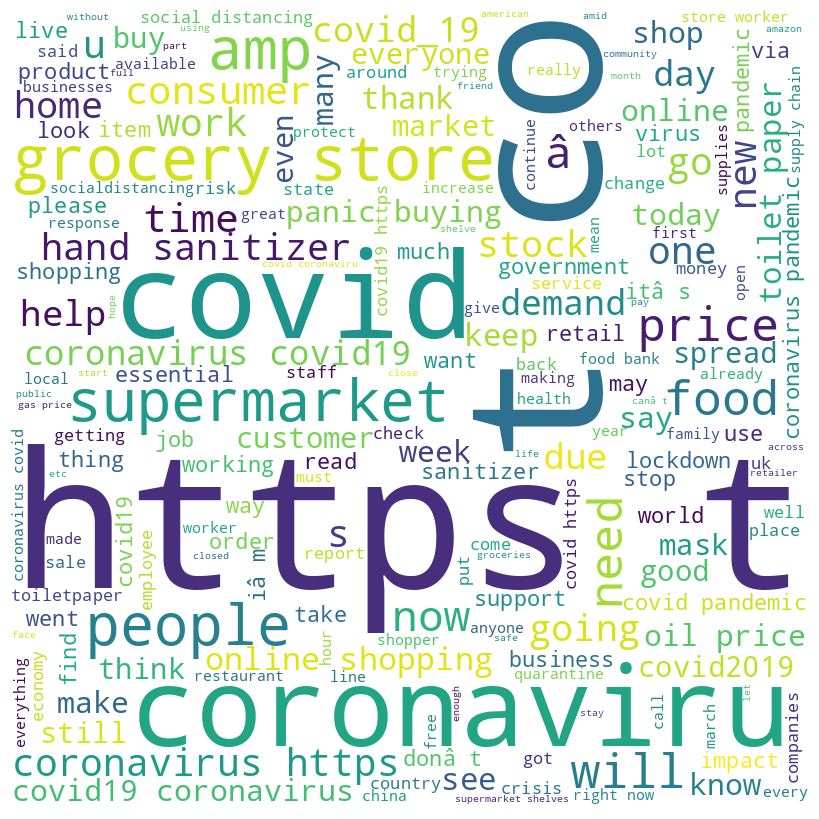

In [34]:
# Python program to generate WordCloud
## Based on https://www.geeksforgeeks.org/generating-word-cloud-python/

from wordcloud import WordCloud, STOPWORDS
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.OriginalTweet:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

##### 1. Why did you pick the specific chart?

So wordcloud gives the nice visual representation of most repeated word.

### Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [35]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Negative


#### Removing Punctuations

In [36]:
# Removing punctuation
# Writing a function which removes punctuation from our dataset
def remove_punc(text):
  no_punc = [char for char in text if char not in string.punctuation]
  return ''.join(no_punc)

In [37]:
# store the Clean punctuation
df['OriginalTweet'] = df['OriginalTweet'].apply(remove_punc)

In [38]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,MeNyrbie PhilGahan Chrisitv httpstcoiFz9FAn2Pa...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia Woolworths to give elder...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,Me ready to go at supermarket during the COVID...,Negative


#### Removing Stopwords

In [39]:
# Removing stopwords
# Writing a function which removes stopwords from our data set
def remove_stopwords(msg):
    no_stop_words = [word for word in msg.split() if word.lower() not in stopwords]
    return ' '.join(no_stop_words)


In [40]:
df["OriginalTweet"] = df["OriginalTweet"].apply(remove_stopwords)

In [41]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,MeNyrbie PhilGahan Chrisitv httpstcoiFz9FAn2Pa...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk neighbours family exchange phone n...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia Woolworths give elderly ...,Positive
3,3802,48754,NaN,16-03-2020,food stock one empty PLEASE dont panic WILL EN...,Positive
4,3803,48755,NaN,16-03-2020,ready go supermarket COVID19 outbreak Im paran...,Negative


#### Text Normalization - Stemming

Words are cropped to save space. SnowballStemmer will be used for that.

Function for stemming

In [63]:
# Creating an object of SnowballStemmer
stemmer = SnowballStemmer("english")

# Function for stemming each word of the given text
def stemming(txt):
    text = [stemmer.stem(word) for word in txt.split()]
    return ' '.join(text)


In [64]:
df["OriginalTweet"] = df["OriginalTweet"].apply(stemming)

In [65]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,menyrbi philgahan chrisitv httpstcoifz9fan2pa ...,Neutral
1,3800,48752,UK,16-03-2020,advic talk neighbour famili exchang phone numb...,Positive
2,3801,48753,Vagabonds,16-03-2020,coronavirus australia woolworth give elder dis...,Positive
3,3802,48754,NaN,16-03-2020,food stock one empti pleas dont panic will eno...,Positive
4,3803,48755,NaN,16-03-2020,readi go supermarket covid19 outbreak im paran...,Negative


##### Which text normalization technique have you used and why?

We used Stemming because stemming is very faster than lemmatization.

## ***ML Model Implementation***

**We will be using tf-idf method for vectorising the text.**

**Then, we will implement 5 models:**

Logistic Regression

Random Forest Classifier

Naive Bayes Classifier

Support Vector Machine(SVM)

Stochastic Gradient Descent Classifier

In [66]:
## defining Independent variable
X = df.OriginalTweet

## defining dependent variable
y = df.Sentiment

In [67]:
# Splitting the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(32925,) (32925,) (8232,) (8232,)


In [86]:
# Creating an object of TfidfVectorizer
tf_idf = TfidfVectorizer()

### ML Model - 1  Logistic Regression

In [70]:
# creating an object of LogisticRegression
logistic_reg = LogisticRegression()

from sklearn.pipeline import Pipeline
# creating a pipeline
model = Pipeline([('vectorizer',tf_idf),('classifier',logistic_reg)])
model.fit(X_train, y_train)


Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression())])

In [71]:
## model prediction
y_pred = model.predict(X_test)

#### Performance using Evaluation metric Score Chart.

In [78]:
print('Accuracy :' ,accuracy_score(y_pred,y_test))
print('Precision :', precision_score(y_pred,y_test, average='weighted'))
print('Recall :', recall_score(y_pred,y_test, average='weighted'))
print(classification_report(y_pred,y_test))

Accuracy : 0.7808551992225462
Precision : 0.7934606213659594
Recall : 0.7808551992225462
              precision    recall  f1-score   support

    Negative       0.81      0.80      0.80      3121
     Neutral       0.56      0.74      0.64      1163
    Positive       0.85      0.78      0.81      3948

    accuracy                           0.78      8232
   macro avg       0.74      0.77      0.75      8232
weighted avg       0.79      0.78      0.78      8232



### ML Model - 2  Random Forest Classifier

In [81]:
# creating an object of Random Forest Classifier
rf = RandomForestClassifier()
# creating a pipeline
model2 = Pipeline([('vectorizer',tf_idf),('classifier',rf)])

model2.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [82]:
## model prediction
y_pred_rf = model2.predict(X_test)

#### Performance using Evaluation metric Score Chart.

In [83]:
print('Accuracy :' ,accuracy_score(y_pred_rf,y_test))
print('Precision :', precision_score(y_pred_rf,y_test, average='weighted'))
print('Recall :', recall_score(y_pred_rf,y_test, average='weighted'))
print(classification_report(y_pred_rf,y_test))

Accuracy : 0.7295918367346939
Precision : 0.7345734766901979
Recall : 0.7295918367346939
              precision    recall  f1-score   support

    Negative       0.70      0.77      0.73      2828
     Neutral       0.61      0.65      0.63      1438
    Positive       0.80      0.73      0.77      3966

    accuracy                           0.73      8232
   macro avg       0.71      0.72      0.71      8232
weighted avg       0.73      0.73      0.73      8232



### ML Model - 3  Naive Bayes Classifier

In [84]:
#Creating an object of  Naive Bayes classifier
multinomial_naive_bayes = MultinomialNB()
# creating a pipeline
model3 = Pipeline([('vectorizer',tf_idf),('classifier',multinomial_naive_bayes)])
# Fit the Algorithm
model3.fit(X_train, y_train)
# Predict on the model
y_pred_multinomial_naive_bayes = model2.predict(X_test)

#### Performance using Evaluation metric Score Chart.

In [85]:
print('Accuracy :' ,accuracy_score(y_pred_multinomial_naive_bayes,y_test))
print('Precision :', precision_score(y_pred_multinomial_naive_bayes,y_test, average='weighted'))
print('Recall :', recall_score(y_pred_multinomial_naive_bayes,y_test, average='weighted'))
print(classification_report(y_pred_multinomial_naive_bayes,y_test))

Accuracy : 0.7295918367346939
Precision : 0.7345734766901979
Recall : 0.7295918367346939
              precision    recall  f1-score   support

    Negative       0.70      0.77      0.73      2828
     Neutral       0.61      0.65      0.63      1438
    Positive       0.80      0.73      0.77      3966

    accuracy                           0.73      8232
   macro avg       0.71      0.72      0.71      8232
weighted avg       0.73      0.73      0.73      8232



### ML Model - 4  Support Vector Machine(SVM)

In [87]:
# creating an object of Support Vector Classifier
svc = SVC()
# creating a pipeline
model4 = Pipeline([('vectorizer',tf_idf),('classifier',svc)])
# Fit the Algorithm
model4.fit(X_train, y_train)
# Predict on the model
y_pred_svc = model2.predict(X_test)

#### Performance using Evaluation metric Score Chart.

In [88]:
print('Accuracy :' ,accuracy_score(y_pred_svc,y_test))
print('Precision :', precision_score(y_pred_svc,y_test, average='weighted'))
print('Recall :', recall_score(y_pred_svc,y_test, average='weighted'))
print(classification_report(y_pred_svc,y_test))

Accuracy : 0.7295918367346939
Precision : 0.7345734766901979
Recall : 0.7295918367346939
              precision    recall  f1-score   support

    Negative       0.70      0.77      0.73      2828
     Neutral       0.61      0.65      0.63      1438
    Positive       0.80      0.73      0.77      3966

    accuracy                           0.73      8232
   macro avg       0.71      0.72      0.71      8232
weighted avg       0.73      0.73      0.73      8232



### ML Model -5  Stochastic Gradient Descent Classifier

In [89]:
# creating an object of Stochastic Gradient Descent Classifier
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)
# creating a pipeline
model5 = Pipeline([('vectorizer',tf_idf),('classifier',sgd_clf)])
# Fit the Algorithm
model5.fit(X_train, y_train)
# Predict on the model
y_pred_sgd = model2.predict(X_test)

#### Performance using Evaluation metric Score Chart.

In [90]:
print('Accuracy :' ,accuracy_score(y_pred_sgd,y_test))
print('Precision :', precision_score(y_pred_sgd,y_test, average='weighted'))
print('Recall :', recall_score(y_pred_sgd,y_test, average='weighted'))
print(classification_report(y_pred_sgd,y_test))

Accuracy : 0.7295918367346939
Precision : 0.7345734766901979
Recall : 0.7295918367346939
              precision    recall  f1-score   support

    Negative       0.70      0.77      0.73      2828
     Neutral       0.61      0.65      0.63      1438
    Positive       0.80      0.73      0.77      3966

    accuracy                           0.73      8232
   macro avg       0.71      0.72      0.71      8232
weighted avg       0.73      0.73      0.73      8232



# Trying on new Tweets

In [102]:
Tweet = ['hospitals are good', 'boy is sad',
         'he fell sick', 'he is not satisfied',
        'he is angry with his behaviour', 'taste of food bad', 'snacks are good']
result = model.predict(Tweet)

print(result)

['Positive' 'Negative' 'Negative' 'Neutral' 'Neutral' 'Negative'
 'Positive']


# **Conclusion On EDA**

In our dataset we have 41157 rows and 6 columns.

We have 0 duplicate records.

In the Location column we have 8590 null values, but we don't need to remove this because for sentiment analysis we use 'OriginalTweet' column. If we remove this null values we lost the important tweets also.

In order to analyse the data we required only two columns "OriginalTweet" & "Sentiment".

The columns such as “UserName” and “ScreenName” does not give any meaningful insights for our analysis.

There are five types of sentiments- Extremely Negative, Negative, Neutral, Positive and Extremely Positive.

There are 5 subcategories, so we will combine 5-class classification problem into a 3-class classification problem by replace Extremely Positive tweets with positive tweets and Extremely Negative tweets with negative tweets.

More positive tweets than neutral or negative ones were tweeted globally.

People tweeted more in March than in April since many nations imposed lockdown during this time.

The majority of the tweets were around 250 characters long, indicating that there was a lot of interest in COVID-19 among the general public.

All tweets data collected from the months of March and April 2020. Bar plot shows us the number of unique values in each column.

Most of the tweets came from London followed by U.S.

Words like COVID19, grocery, supermarket, shop, price, etc. are frequently used in tweets, indicating that throughout the pandemic, individuals were mostly concerned about food supply and their costs.



# CONCLUSION ON MODEL TRAINING


At the end we conclude our project with 5 models namely Logistic Regression, Random Forest Classifier, Naive Bayes Classifier, Support Vector Machine(SVM) and Stochastic Gradient Descent Classifier. We are getting the highest accuracy of about 78% with Logistic Regression. We also tested our best models on some new tweets and the results are fairly accurate.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***